###Import


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import scipy.stats as stats
%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, f_regression
from sklearn.metrics import accuracy_score, log_loss
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

###Load Dataset



In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/sample_submission.csv')


In [ ]:
print(train_data.head(5))
print(test_data.head(5))

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]
     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]


In [ ]:
train_data.drop(['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
test_data.drop(['Id','Alley','PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [ ]:
print(train_data.dtypes.astype(str).value_counts())

object     39
int64      34
float64     3
dtype: int64


In [ ]:
for i in test_data:
  if test_data[i].isnull().sum():
    print(i,' ',test_data[i].dtype,' ',test_data[i].isnull().sum())

MSZoning   object   4
LotFrontage   float64   227
Utilities   object   2
Exterior1st   object   1
Exterior2nd   object   1
MasVnrType   object   16
MasVnrArea   float64   15
BsmtQual   object   44
BsmtCond   object   45
BsmtExposure   object   44
BsmtFinType1   object   42
BsmtFinSF1   float64   1
BsmtFinType2   object   42
BsmtFinSF2   float64   1
BsmtUnfSF   float64   1
TotalBsmtSF   float64   1
BsmtFullBath   float64   2
BsmtHalfBath   float64   2
KitchenQual   object   1
Functional   object   2
FireplaceQu   object   730
GarageType   object   76
GarageYrBlt   float64   78
GarageFinish   object   78
GarageCars   float64   1
GarageArea   float64   1
GarageQual   object   78
GarageCond   object   78
SaleType   object   1


In [ ]:
clear_train = pd.DataFrame()
null_train = pd.DataFrame()
clear_test = pd.DataFrame()
null_test = pd.DataFrame()
for i in train_data:
  if train_data[i].isnull().sum():
    #print(i,' ',train_data[i].dtype,' ',train_data[i].isnull().sum())
    null_train[i] = train_data[i]
  else:
    clear_train[i] = train_data[i]
  if i != 'SalePrice' and test_data[i].isnull().sum():
    null_test[i] = test_data[i]
  elif i != 'SalePrice' and test_data[i].isnull().sum() == 0:
    clear_test[i] = test_data[i]
print(clear_train.shape)
print(null_train.shape)
print(clear_test.shape)
print(null_test.shape)

(1460, 61)
(1460, 15)
(1459, 46)
(1459, 29)


In [ ]:
numerical_column = pd.DataFrame()
nominal = pd.DataFrame()
ordinal = pd.DataFrame()

numerical_test = pd.DataFrame()
nominal_test = pd.DataFrame()
ordinal_test = pd.DataFrame()

In [ ]:
nominal_column = ['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','Functional','GarageType','PavedDrive','SaleType']
ordinal_column = ['Utilities','BldgType','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','CentralAir','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Heating','RoofMatl','Electrical','GarageFinish','GarageQual','GarageCond','SaleCondition']

In [ ]:
for i in train_data:
  if (i not in ordinal_column) and (i not in nominal_column):
    numerical_column[i] = train_data[i]
  if (i not in ordinal_column) and (i not in nominal_column) and (i != 'SalePrice'):
    numerical_test[i] = test_data[i]
#numerical_column

In [ ]:
clear_train.loc[clear_train['Exterior1st'] == clear_train['Exterior2nd'],'Exterior'] = 1
clear_train.loc[clear_train['Exterior1st'] != clear_train['Exterior2nd'],'Exterior'] = 2
clear_train.loc[clear_train['Condition1'] == clear_train['Condition2'],'Condition'] = 1
clear_train.loc[clear_train['Condition1'] != clear_train['Condition2'],'Condition'] = 2
clear_train = clear_train.drop(['Exterior1st','Exterior2nd','Condition1','Condition2'],axis = 1)

#clear_test.loc[clear_test['Exterior1st'] == clear_test['Exterior2nd'],'Exterior'] = 1
#clear_test.loc[clear_test['Exterior1st'] != clear_test['Exterior2nd'],'Exterior'] = 2
#clear_test.loc[clear_test['Condition1'] == clear_test['Condition2'],'Condition'] = 1
#clear_test.loc[clear_test['Condition1'] != clear_test['Condition2'],'Condition'] = 2
#clear_test = clear_test.drop(['Condition1','Condition2'],axis = 1)
#clear_test = clear_test.drop(['Exterior1st','Exterior2nd','Condition1','Condition2'],axis = 1)

In [ ]:
utilities = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2,'ELO': 1}
clear_train['Utilities'] = clear_train['Utilities'].map(utilities)
#ordinal_test['Utilities'] = ordinal_test['Utilities'].map(utilities)

housStyle = {'1.5Fin':1.5, '1.5Unf':1.25, '1Story':1, '2.5Fin':2.5, '2.5Unf':2.25, '2Story':2,
       'SFoyer':3, 'SLvl':3.5}
clear_train['HouseStyle'] = clear_train['HouseStyle'].map(housStyle)
#ordinal_test['HouseStyle'] = ordinal_test['HouseStyle'].map(housStyle)

extraq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
clear_train['ExterQual'] = clear_train['ExterQual'].map(extraq)
#ordinal_test['ExterQual'] = ordinal_test['ExterQual'].map(extraq)
extrac = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
clear_train['ExterCond'] = clear_train['ExterCond'].map(extrac)
#ordinal_test['ExterCond'] = ordinal_test['ExterCond'].map(extrac)


bstmq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
#clear_train['BsmtQual'] = clear_train['BsmtQual'].map(bstmq)
#ordinal_test['BsmtQual'] = ordinal_test['BsmtQual'].map(bstmq)
bstmc = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
#clear_train['BsmtCond'] = clear_train['BsmtCond'].map(bstmc)
#ordinal_test['BsmtCond'] = ordinal_test['BsmtCond'].map(bstmc)

bstmt1 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NA': 0}
#ordinal_test['BsmtFinType1'] = ordinal_test['BsmtFinType1'].map(bstmt1)
bstmt2 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NA': 0}
#ordinal['BsmtFinType2'] = ordinal['BsmtFinType2'].map(bstmt2)
#ordinal_test['BsmtFinType2'] = ordinal_test['BsmtFinType2'].map(bstmt2)

bstmexp = {'Gd': 4, 'Av': 3, 'Mn': 2,'No': 1,'NA': 0}
#ordinal['BsmtExposure'] = ordinal['BsmtExposure'].map(bstmexp)
#ordinal_test['BsmtExposure'] = ordinal_test['BsmtExposure'].map(bstmexp)

heat = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
clear_train['HeatingQC'] = clear_train['HeatingQC'].map(heat)
#ordinal_test['HeatingQC'] = ordinal_test['HeatingQC'].map(heat)

elec = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3,'FuseP': 2,'Mix': 3.5}
#ordinal['Electrical'] = ordinal['Electrical'].map(elec)
#ordinal_test['Electrical'] = ordinal_test['Electrical'].map(elec)

kitch = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
clear_train['KitchenQual'] = clear_train['KitchenQual'].map(kitch)
#ordinal_test['KitchenQual'] = ordinal_test['KitchenQual'].map(kitch)

grgq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
#ordinal['GarageQual'] = ordinal['GarageQual'].map(grgq)
#ordinal_test['GarageQual'] = ordinal_test['GarageQual'].map(grgq)
grgc = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
#ordinal['GarageCond'] = ordinal['GarageCond'].map(grgc)
#ordinal_test['GarageCond'] = ordinal_test['GarageCond'].map(grgc)

In [ ]:
def mean_encoding(data,data1,d_type):
  for i in data:
    if i != 'SalePrice' and i!= 'Exterior' and i!= 'Condition' and ((d_type == 'nominal' and i in nominal_column) or (d_type == 'ordinal' and i in ordinal_column and data[i].dtype == object)):
      Mean_encoded_subject = data.groupby([i])['SalePrice'].mean().to_dict() 
      sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
      #print('Dictionary in ascending order by value : ',sorted_d)
      li = list(sorted_d)
      new_dict = {}
      for j in li:
        new_dict[j] = li.index(j)+1
      #print(new_dict)
      data[i] =  data[i].map(new_dict) 
      #data1[i] =  data1[i].map(new_dict) 
  return data  
  #return data,data1  
def count_encoding(data,data1):
  for i in data:
    if i != 'SalePrice' and i!= 'Exterior' and i!= 'Condition':
      Mean_encoded_subject = data[i].value_counts().to_dict() 
      sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
      #print('Dictionary in ascending order by value : ',sorted_d)
      li = list(sorted_d)
      new_dict = {}
      for j in li:
        new_dict[j] = li.index(j)+1
      #print(new_dict)
      data[i] =  data[i].map(new_dict) 
      data1[i] =  data1[i].map(new_dict) 
  return data,data1

In [ ]:
clear_train = mean_encoding(clear_train,clear_test,'nominal')
clear_train = mean_encoding(clear_train,clear_test,'ordinal')
#nominal_mean_encode,nominal_test_mean_encode = mean_encoding(nominal,nominal_test)
#nominal_count_encode,nominal_test_count_encode = count_encoding(nominal,nominal_test)

In [ ]:
print(null_train.columns)
#print(null_test.columns)

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')


In [ ]:
lii = ['YearBuilt','YearRemodAdd','YrSold','MoSold']
#lii = ['GarageYrBlt','YearBuilt','YearRemodAdd']
for i in lii:
  Mean_encoded_subject = clear_train.groupby([i])['SalePrice'].mean().to_dict()
  #Mean_encoded_subject1 = numerical_test[i].value_counts().to_dict() 
  sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
  #sorted_d1 = dict(sorted(Mean_encoded_subject1.items(), key=operator.itemgetter(1)))
  #print('Dictionary in ascending order by value : ',sorted_d)
  li = list(sorted_d)
  #li1 = list(sorted_d1)
  new_dict = {}
  #new_dict1 = {}
  for J in li:
    new_dict[J] = li.index(J)+1
  #for J in li1:
    #new_dict1[J] = li1.index(J)+1
  #print(new_dict)
  clear_train[i] =  clear_train[i].map(new_dict)
  #numerical_test[i] =  numerical_test[i].map(new_dict1) 

In [ ]:
def plots(df, col):
  plt.figure(figsize = (15,6))
  plt.subplot(1,2,1)
  df[col].hist()

  plt.subplot(1,2,2)
  stats.probplot(df[col],dist='norm',plot = plt)

  #plt.subplot(1,2,1)
  #sns.distplot(df[col])
  plt.show()

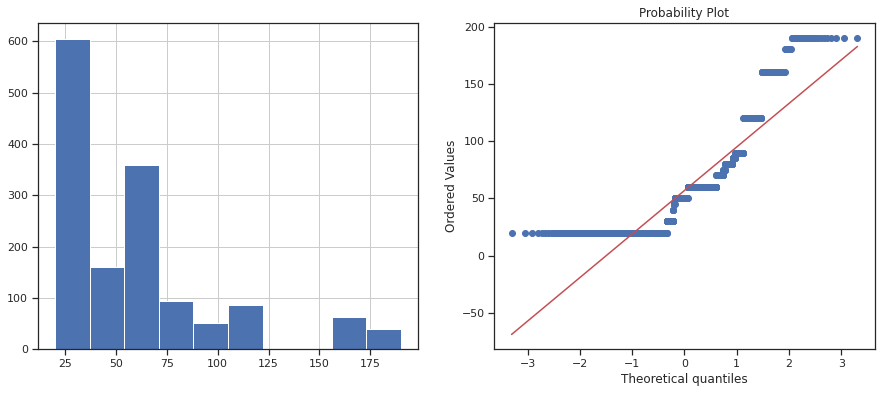

In [ ]:
plots(clear_train,'MSSubClass')

In [ ]:
'''
#Log transformation
clear_train['Log_MSSubClass'] = np.log(clear_train['MSSubClass']+1)
print('Log transformation')
plots(clear_train,'Log_MSSubClass')
#Reciprocal transformation
clear_train['Rec_MSSubClass'] = 1/(clear_train['MSSubClass']+1)
print('Reciprocal transformation')
plots(clear_train,'Rec_MSSubClass')
#Square root transformation
clear_train['Sqr_MSSubClass'] = clear_train['MSSubClass']**(1/2)
print('Square root transformation')
plots(clear_train,'Sqr_MSSubClass')
#Exponential transformation
clear_train['Exp_MSSubClass'] = clear_train['MSSubClass']**(1/5)
print('Exponential transformation')
plots(clear_train,'Exp_MSSubClass')
#BoxCox
clear_train['Box_MSSubClass'],param= stats.boxcox(clear_train.MSSubClass+1)
print('BoxCox Optimal_lamda:', param)
plots(clear_train,'Box_MSSubClass')

'''


"\n#Log transformation\nclear_train['Log_MSSubClass'] = np.log(clear_train['MSSubClass']+1)\nprint('Log transformation')\nplots(clear_train,'Log_MSSubClass')\n#Reciprocal transformation\nclear_train['Rec_MSSubClass'] = 1/(clear_train['MSSubClass']+1)\nprint('Reciprocal transformation')\nplots(clear_train,'Rec_MSSubClass')\n#Square root transformation\nclear_train['Sqr_MSSubClass'] = clear_train['MSSubClass']**(1/2)\nprint('Square root transformation')\nplots(clear_train,'Sqr_MSSubClass')\n#Exponential transformation\nclear_train['Exp_MSSubClass'] = clear_train['MSSubClass']**(1/5)\nprint('Exponential transformation')\nplots(clear_train,'Exp_MSSubClass')\n#BoxCox\nclear_train['Box_MSSubClass'],param= stats.boxcox(clear_train.MSSubClass+1)\nprint('BoxCox Optimal_lamda:', param)\nplots(clear_train,'Box_MSSubClass')\n\n"

In [ ]:
temp_df = clear_train

In [ ]:
#remove outlier by z-score
z = np.abs(stats.zscore(temp_df))
#print(z)
temp_df1 = temp_df[(z < 4).all(axis=1)]
#remove outlier by IQR
Q1 = temp_df.quantile(0.25)
Q3 = temp_df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

temp_df2 = temp_df[~((temp_df < (Q1 - 1.5 * IQR)) |(temp_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
null_train['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [ ]:
log_data = pd.DataFrame()
rec_data = pd.DataFrame()
sqr_data = pd.DataFrame()
exp_data = pd.DataFrame()
box_data = pd.DataFrame()
lmd = {}
for i in clear_train:
  log = 'Log_' + i
  rec = 'Rec_' + i
  sqr = 'Sqr_' + i
  exp = 'Exp_' + i
  box = 'Box_' + i
  log_data[log] = np.log(clear_train[i]+1)
  rec_data[rec] = 1/(clear_train[i]+1)
  sqr_data[sqr] = clear_train[i]**(1/2)
  exp_data[exp] = clear_train[i]**(1/5)
  box_data[box],lamda = stats.boxcox(clear_train[i]+1)
  lmd[box] = lamda

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [ ]:
log_data['MasVnrType'] = null_train['MasVnrType']
log_test = pd.DataFrame()
null_row_list = list(log_data[log_data['MasVnrType'].isnull()].index.tolist())
#clear_train[i] = null_train[i]
col = list(log_data.columns)
k = -1
for j in null_row_list:
  k+=1 
  null_row_value = log_data.iloc[j]
  null_row_value = list(null_row_value.values)
  #print(len(null_row_value))
  for i in range(len(null_row_value)):
    #print(col[i],' ', null_row_value[i])
    #log_test [col[i]] = null_row_value[i]
    log_test.loc[k,col[i]] = null_row_value[i]
  #log_test
log_data = log_data.dropna()

In [ ]:
log_test['MasVnrType'] = train_predictions
log_test

Log_MSSubClass  Log_MSZoning  ...  Log_Condition  MasVnrType
0        4.110874      1.609438  ...       0.693147     BrkFace
1        3.044522      1.609438  ...       0.693147        None
2        4.110874      1.791759  ...       0.693147        None
3        3.044522      1.609438  ...       0.693147        None
4        3.044522      1.791759  ...       0.693147        None
5        4.795791      1.791759  ...       0.693147     BrkFace
6        3.044522      1.609438  ...       0.693147     BrkFace
7        4.110874      1.609438  ...       0.693147        None

[8 rows x 60 columns]

In [ ]:
log_test = log_test.drop(['MasVnrType'],axis = 1)
log_test.shape


(8, 59)

In [ ]:
np.unique(log_data['MasVnrType'])

array(['BrkCmn', 'BrkFace', 'None', 'Stone'], dtype=object)

In [ ]:
y = log_data['MasVnrType']
log_data = log_data.drop(['MasVnrType'],axis = 1)

In [ ]:
#y = np.array(y)
#y = y.reshape(-1,1)
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(y)
#y = enc.transform(y).toarray()

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
#le.inverse_transform([0, 0, 1, 2])

array([1, 2, 1, ..., 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(log_data, y, test_size=0.2, random_state=1)

In [ ]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),]

In [ ]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [ ]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print('\n',name,':')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.3%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



 LogisticRegression :
Accuracy: 65.292%
Log Loss: 0.7391437656108008

 KNeighborsClassifier :
Accuracy: 58.419%
Log Loss: 7.018196397409261

 SVC :
Accuracy: 65.292%
Log Loss: 0.8055150769619197

 DecisionTreeClassifier :
Accuracy: 60.137%
Log Loss: 13.768034576665427

 RandomForestClassifier :
Accuracy: 73.883%
Log Loss: 0.9455962355659117

 GaussianNB :
Accuracy: 27.148%
Log Loss: 23.575615870727557


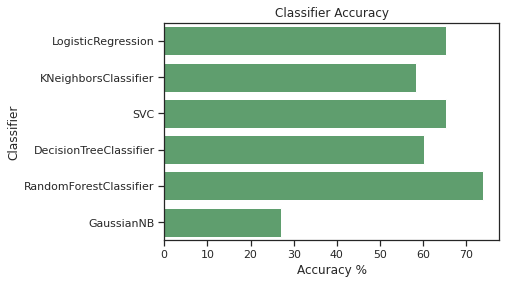

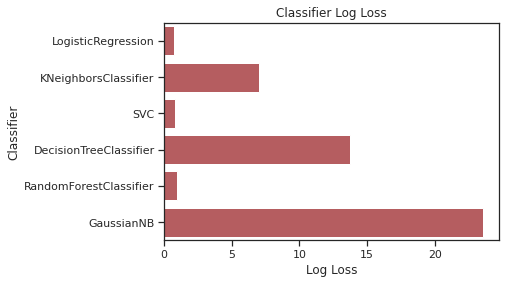

In [ ]:
#sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

#sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="r")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
train_predictions = clf.predict(log_test)
train_predictions = le.inverse_transform(train_predictions)
train_predictions

array(['BrkFace', 'None', 'None', 'None', 'None', 'BrkFace', 'BrkFace',
       'None'], dtype=object)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
res = regressor.score(X_train, y_train)
print(res*100)
y_pred = regressor.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse
# 34 features
#81.11211900041317
#32908.83108668875

# 25 features
80.0038442074204
32692.370436137197

In [ ]:
passref = PassiveAggressiveRegressor(max_iter=1000000,early_stopping=False,n_iter_no_change=1000,shuffle=True,)
passref.fit(X_train, y_train)
res = passref.score(X_train, y_train)
print(res*100)
y_pred = passref.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse

In [ ]:
'''
print('Main Value')
plots(temp_df1,'MSZoning')
print('Rec Transformation')
plots(temp_df1,'Rec_MSSubClass')
print('Log Transformation')
plots(temp_df1,'Log_MSSubClass')
print('Exponential Transformation')
plots(temp_df1,'Exp_MSSubClass')
print('Sqr root transformation')
plots(temp_df1,'Sqr_MSSubClass')
print('BoxCox Transformation')
plots(temp_df1,'Box_MSSubClass')
'''

In [ ]:
import operator
x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
sorted_x = sorted(x.items(), key=operator.itemgetter(1))

In [ ]:
sorted_x[0][0]

0

In [ ]:
lmd['Box_SalePrice']


In [ ]:
from scipy.special import boxcox, inv_boxcox
y = boxcox([1, 4, 10], 2.5)
inv_boxcox(box_data['Box_SalePrice'], lmd['Box_SalePrice'])-1

In [ ]:
g = sns.pairplot(rec_data, vars=["Rec_LotConfig", "Rec_SalePrice"],kind = 'reg')

In [ ]:
train_data['SalePrice']

In [ ]:
#g = sns.pairplot(log_data, kind="reg")

In [ ]:
'''
for i in null_train:
  null_row_list = list(null_train[null_train[i].isnull()].index.tolist())
  clear_train[i] = null_train[i]
  for j in null_row_list:
    null_row_value = train_data.iloc[234]
    null_row_value = list(null_row_value.values)
    clear_test [i] = null_row_value
  clear_train.dropna()
'''